

* <h1>Book Store Web Scrapping </h1>
 Where we are going to scrap more book information from a book store website
 which is usually built for web scraping only.
* Link: https://books.toscrape.com/index.html





In [118]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [119]:
no_of_pages=50

In [120]:
page_urls=[]
img_urls=[]
titles=[]
ratings=[]
prices=[]

In [121]:
def add_page_url(no_pages):

  '''Function : where it loop through all pages based on no_of_pages and where every page has unique url with slight changes numbers in sequence,
                Where we append the url to page_urls variable.Likewise we scrap the book titles using BeautifulSoup library from the respected url and
                append to the titles variable.Where Ratings and Prices of the book were scrapped from the web page and appended to the list.Likewise
                image_urls also been added.
     Arguments : no_pages --> where it take input of integer datatype.Basically no of pages we need to scrap. '''

  for i in range(1,no_pages+1):
    url='https://books.toscrape.com/catalogue/category/books_1/page-{}.html'.format(i)
    data=requests.get(url).text
    soup=BeautifulSoup(data,'html.parser')
    heading=soup.find_all('h3')
    for i in heading:
      h=i.getText()
      page_urls.append(url)
      titles.append(h)
    rat=soup.find_all('p',class_='star-rating')
    for i in rat:
      ratings.append(i.attrs['class'][1])
    money=soup.find_all('p',class_='price_color')
    for i in money:
      prices.append(i.getText())
    img=soup.find_all('img')
    for i in img:
      s='https://books.toscrape.com'+i['src'].replace('..','')
      img_urls.append(s)




In [122]:
add_page_url(no_of_pages)

In [123]:
len(page_urls)==len(img_urls)==len(ratings)==len(prices)==len(titles)

True

In [124]:
book_dict={'Page_url':page_urls,'Book_Title':titles,'Rating':ratings,'Price':prices,'Image_url':img_urls}

In [125]:
book_df=pd.DataFrame(book_dict)
book_df.head()

,Page_url,Book_Title,Rating,Price,Image_url
0,https://books.toscrape.com/catalogue/category/...,A Light in the ...,Three,Â£51.77,https://books.toscrape.com///media/cache/2c/da...
1,https://books.toscrape.com/catalogue/category/...,Tipping the Velvet,One,Â£53.74,https://books.toscrape.com///media/cache/26/0c...
2,https://books.toscrape.com/catalogue/category/...,Soumission,One,Â£50.10,https://books.toscrape.com///media/cache/3e/ef...
3,https://books.toscrape.com/catalogue/category/...,Sharp Objects,Four,Â£47.82,https://books.toscrape.com///media/cache/32/51...
4,https://books.toscrape.com/catalogue/category/...,Sapiens: A Brief History ...,Five,Â£54.23,https://books.toscrape.com///media/cache/be/a5...


In [126]:
book_df.index+=1

In [127]:
book_df['Price']=book_df['Price'].str.replace('Â£','')

In [128]:
book_df['Rating']=book_df['Rating'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5})

In [129]:
book_df.head()

,Page_url,Book_Title,Rating,Price,Image_url
1,https://books.toscrape.com/catalogue/category/...,A Light in the ...,3,51.77,https://books.toscrape.com///media/cache/2c/da...
2,https://books.toscrape.com/catalogue/category/...,Tipping the Velvet,1,53.74,https://books.toscrape.com///media/cache/26/0c...
3,https://books.toscrape.com/catalogue/category/...,Soumission,1,50.10,https://books.toscrape.com///media/cache/3e/ef...
4,https://books.toscrape.com/catalogue/category/...,Sharp Objects,4,47.82,https://books.toscrape.com///media/cache/32/51...
5,https://books.toscrape.com/catalogue/category/...,Sapiens: A Brief History ...,5,54.23,https://books.toscrape.com///media/cache/be/a5...


In [130]:
book_df.dtypes

Page_url      object
Book_Title    object
Rating         int64
Price         object
Image_url     object
dtype: object

In [143]:
book_df.isnull().sum()

Page_url      0
Book_Title    0
Rating        0
Price         0
Image_url     0
dtype: int64

In [131]:
book_df['Price']=book_df['Price'].astype('float')

In [132]:
book_df.dtypes

Page_url       object
Book_Title     object
Rating          int64
Price         float64
Image_url      object
dtype: object

In [135]:
correlation=book_df.corr()

<ipython-input-135-1fb15ee0b7fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=book_df.corr()


<Axes: >

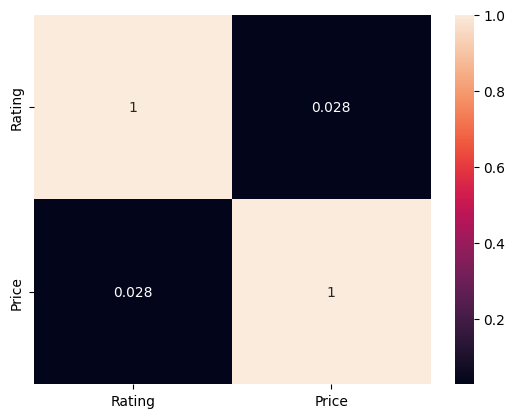

In [137]:
sns.heatmap(correlation,annot=True)

The above Heatmap represents the price and rating attribute are **moderately correlated.**

Based on processed above dataset.We can ask questions like.

**1. Give me top 5 higly rated books?**

In [148]:
book_df.sort_values('Rating',ascending=False).head()[['Book_Title','Rating']]

,Book_Title,Rating
1000,"1,000 Places to See ...",5
561,The Barefoot Contessa Cookbook,5
602,The Darkest Corners,5
599,The False Prince (The ...,5
593,The Mathews Men: Seven ...,5


**2. Give me top 5 high price books?**

In [149]:
book_df.sort_values('Price',ascending=False).head()[['Book_Title','Price']]

,Book_Title,Price
649,The Perfect Play (Play ...,59.99
618,Last One Home (New ...,59.98
861,Civilization and Its Discontents,59.95
561,The Barefoot Contessa Cookbook,59.92
367,The Diary of a ...,59.90


**3. Give me individual counts of Ratings?**

In [150]:
book_df['Rating'].value_counts()

1    226
3    203
5    196
2    196
4    179
Name: Rating, dtype: int64

In [153]:
book_df['Rating'].value_counts().sum()==len(book_df)

True